## Kurnia Anwar Ra'if - Data Scientist
github : 

In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,plot_roc_curve,accuracy_score

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges column is seen as object type, but includes numeric type values. Convert this column to numeric.

In [4]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 




There are 11 missing values in TotalCharges column. We can fill the missing values with median data, set it to 0 or delete these rows, it is up to you. I prefer deleting these columns because it is a small part compared to all data.

We don't need customerID column for analyzing, so we can drop this column.

In [5]:
#delete rows including null values
data.dropna(inplace = True)

In [6]:
data.drop(["customerID"],axis=1,inplace = True)

Replace text columns to integers. The columns below includes similar text values so I changed them once.

In [7]:
data.gender = [1 if each == "Male" else 0 for each in data.gender]

columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'MultipleLines',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    data[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in data[item]]
    
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


### EDA

Let's look at the distribution of Churn values. As you can see below, the data set is imbalanced. But for now, I will ignore this.


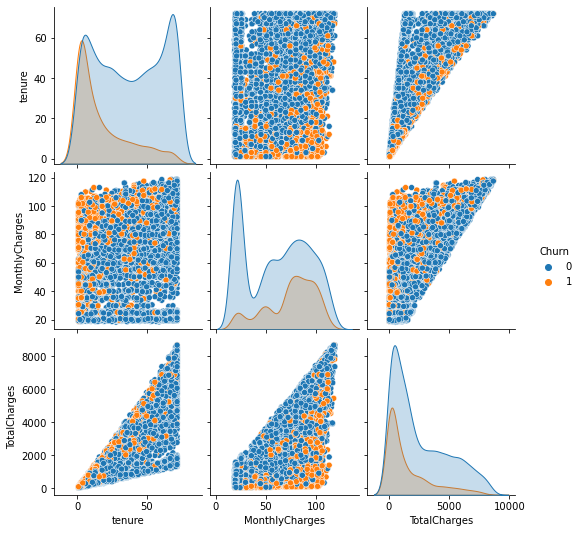

In [8]:
sns.pairplot(data,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

People having lower tenure and higher monthly charges are tend to churn more. Also as you can see below; having month-to-month contract and fiber obtic internet have a really huge effect on churn probability.

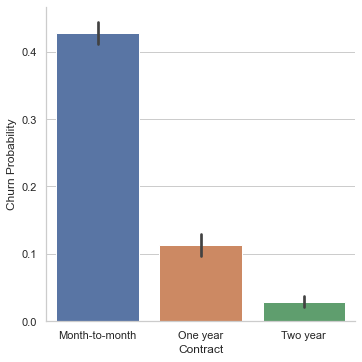

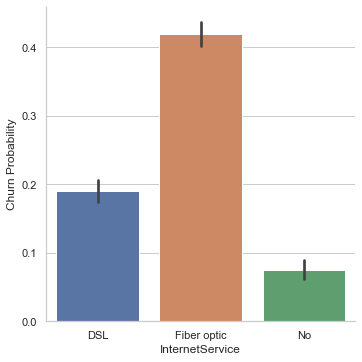

In [9]:
sns.set(style="whitegrid")
g1=sns.catplot(x="Contract", y="Churn", data=data,kind="bar")
g1.set_ylabels("Churn Probability")

g2=sns.catplot(x="InternetService", y="Churn", data=data,kind="bar")
g2.set_ylabels("Churn Probability")

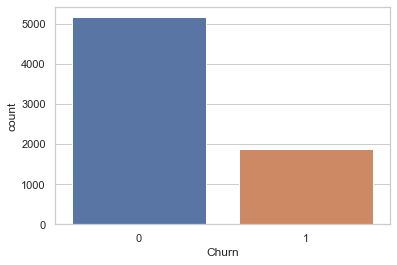

In [10]:
sns.countplot(x="Churn",data=data);



Convert remaining text based columns to dummy columns using pandas get_dummies function. This function creates new columns named as values of the related columns.

Now our data set only have integer and numerical columns so that we can apply statistical models.


In [11]:
data = pd.get_dummies(data=data)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,-1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,-1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0




Let's see the correlation between churn and the remaining columns. Customers having month-to-month contract, having fiber optic internet service and using electronic payment are tend to churn more whereas people having two-year contract and having internet service are tend to not churn.




### Prepare x and y

First, seperate x and y values. y would be our class which is Churn column in this dataset. x would be the remaing columns. Also, apply normalization to x in order to scale all values between 0 and 1.


In [12]:
#assign Class_att column as y attribute
y = data.Churn.values

#drop Class_att column, remain only numerical columns
new_data = data.drop(["Churn"],axis=1)

#Normalize values to fit between 0 and 1. 
x = (new_data-np.min(new_data))/(np.max(new_data)-np.min(new_data)).values



### Splitting Data

Split the data set as train and test with 20:80 ratio.


In [13]:
#Split data into Train and Test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state =1)


### Apply Machine Learning Algorithms

Let's start to apply some machine learning algorithms and find the accuracy of each.

#### 1. KNN Classification




We assume K = 3 for first iteration, but actually we don't know what is the optimal K value that gives maximum accuracy. So we can write a for loop that iterates for example 25 times and gives the accuracy at each iteartion. So that we can find the optimal K value.


In [14]:
# %%KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 3
knn.fit(x_train,y_train)
predicted_y = knn.predict(x_test)
print("KNN accuracy according to K=3 is :",knn.score(x_test,y_test))

KNN accuracy according to K=3 is : 0.7469793887704336


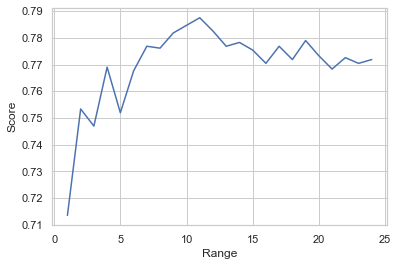

In [15]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(x_train,y_train)
    score_array.append(knn_loop.score(x_test,y_test))
    
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

As you can see above, if we use K = 11, then we get maximum score of %78.7

In [16]:
knn_model = KNeighborsClassifier(n_neighbors = 11) #set K neighbor as 11
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy according to K=11 is :",accuracy_knn)

KNN accuracy according to K=11 is : 0.7874911158493249


##### KNN accuracy according to K=11 is : 0.7874911158493249

#### 2. SVM(Support Vector Machine) Classification

In [17]:
# %%SVM Classification
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(x_train,y_train)
accuracy_svc = svc_model.score(x_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7967306325515281


#### 3. Logistic Regression Classification

In [18]:
# %%Logistic regression classification
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.798862828713575


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 4. Decision Tree Classification

In [19]:
#Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7199715707178393


#### 5. Random Forest Classification


In [20]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 1)
rf_model_initial.fit(x_train,y_train)
print("Random Forest accuracy for 5 trees is :",rf_model_initial.score(x_test,y_test))

Random Forest accuracy for 5 trees is : 0.7668798862828714




I set tree number as 5 initially. But I want to find the appropriate tree number. Let's try to find the best number with trying 1 to 50.


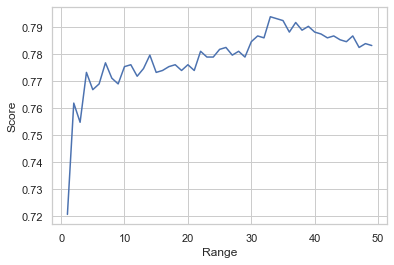

In [21]:
score_array = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) #set K neighbor as 3
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))
    
plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()



As you can see, the highest accuracy is at n_estimators = 33.


In [22]:
rf_model = RandomForestClassifier(n_estimators = 33, random_state = 1) #set tree number as 33
rf_model.fit(x_train,y_train)
accuracy_rf = rf_model.score(x_test,y_test)
print("Random Forest accuracy for 33 trees is :",accuracy_rf)

Random Forest accuracy for 33 trees is : 0.7938877043354655


#### 6.Naive Bayes Classification

In [23]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
accuracy_nb = nb_model.score(x_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.7213930348258707




Logistic regression and SVC classificagtion algorithms have the highest accuracy. But as I mentioned before, our *data is imbalanced*. So it is important to look at the confusion matrix according to these two algorithms. With imbalanced datasets, the highest accuracy does not give the best model. Assume we have 1000 total rows, 10 rows are churn and 990 rows are non-churn. If we find all these 10 churn rows as non-churn, then the accuracy will be still %99. Althogh it is a wrong model, if we do not look at the confusion matrix, then we can not see the mistake.

Confusion matrix gives us FN(false negative), FP(false positive), TN(true negative) and TP(true positive) values.
missing

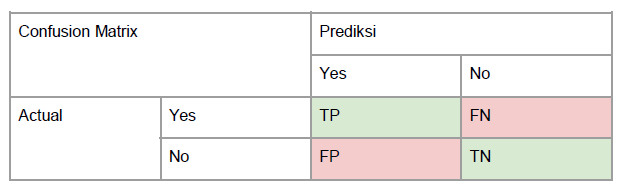


### Model Evaluation

In [24]:
def model_evaluation(model,name):
    
    confusion_matrix = pd.crosstab(y_test, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

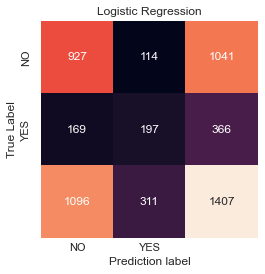

In [25]:
lr_y_pred = lr_model.predict(x_test)
model_evaluation(lr_y_pred,"Logistic Regression")

TN = 927
FP = 114
FN = 169
TP = 197
This means; there are total 927+114 = 1041 actual non-churn values and the algorithm predict 927 of them as non-churn and 114 of them churn. Also there are total 169 + 197 = 366 actual churn values and the algorithm predict 169 of them as non-churn and 197 of them as churn.

Acuuracy should not be used as solely metric for imbalance datasets. There are some other metrics named as recall and precision.
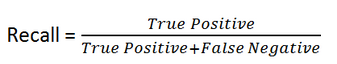

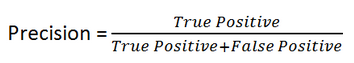

Sometimes we get high recall and low precision or vice versa. There is another metric that combines both precision and recall like below. We will use F1 score to identify the best algorithm score.

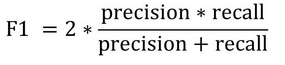

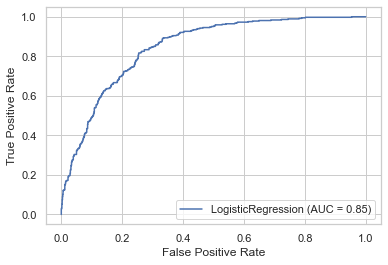

In [26]:
plot_roc_curve(lr_model,x_test,y_test)
plt.show()

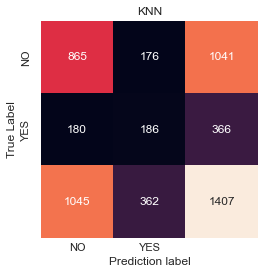

In [27]:
knn_model =  knn.predict(x_test)
model_evaluation(knn_model,"KNN")

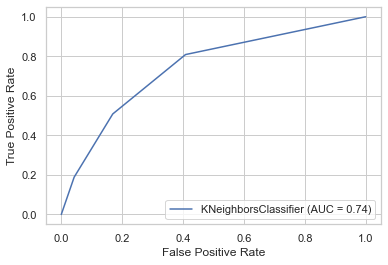

In [28]:
plot_roc_curve(knn,x_test,y_test)
plt.show()

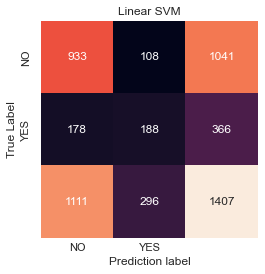

In [29]:
model_evaluation(svc_model.predict(x_test),"Linear SVM")

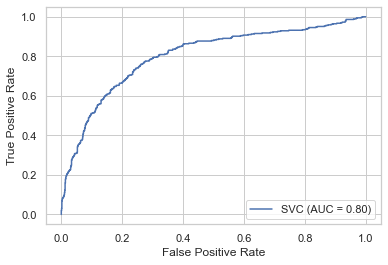

In [30]:
plot_roc_curve(svc_model,x_test,y_test)
plt.show()

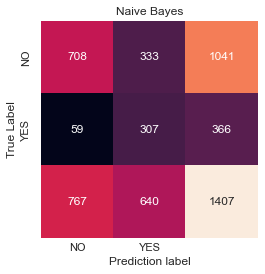

In [31]:
model_evaluation(nb_model.predict(x_test),"Naive Bayes")

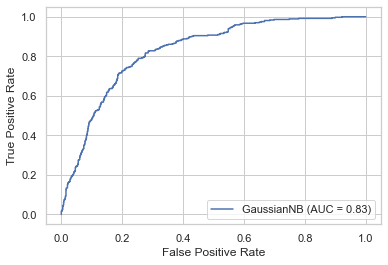

In [32]:
plot_roc_curve(nb_model,x_test,y_test)
plt.show()

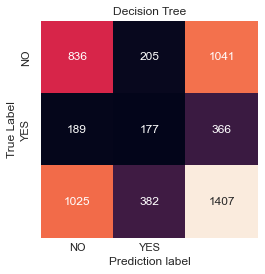

In [33]:
model_evaluation(dt_model.predict(x_test),"Decision Tree")

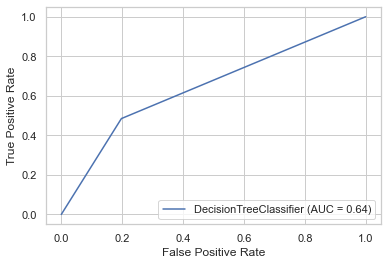

In [34]:
plot_roc_curve(dt_model,x_test,y_test)
plt.show()

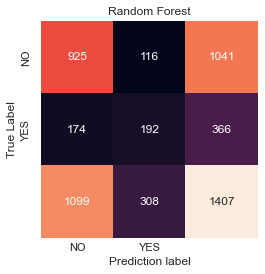

In [35]:
model_evaluation(rf_model.predict(x_test),"Random Forest")

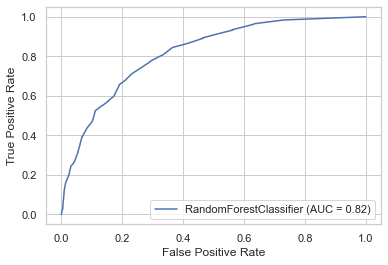

In [36]:
plot_roc_curve(rf_model,x_test,y_test)
plt.show()

In [37]:
# the function that prints all scores
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [43]:
print_scores("========Logistic Regression=========;",y_test, lr_model.predict(x_test))
print('========================')
print_scores("=========SVC=========;",y_test, svc_model.predict(x_test))
print('========================')
print_scores("=========Naive Bayes=========;",y_test, nb_model.predict(x_test))
print('========================')
print_scores("=========Decision Tree=========;",y_test, dt_model.predict(x_test))
print('========================')
print_scores("=========Random Forest=========;",y_test, rf_model.predict(x_test))
print_scores("=========KNN=========;",y_test, knn.predict(x_test))
print('========================')

========Logistic Regression=========;
accuracy:  0.798862828713575
precision:  0.6334405144694534
recall:  0.5382513661202186
f1_score:  0.7932808947173186
=========SVC=========;
accuracy:  0.7967306325515281
precision:  0.6351351351351351
recall:  0.5136612021857924
f1_score:  0.7892897235731324
=========Naive Bayes=========;
accuracy:  0.7213930348258707
precision:  0.4796875
recall:  0.8387978142076503
f1_score:  0.738223282153598
=========Decision Tree=========;
accuracy:  0.7199715707178393
precision:  0.46335078534031415
recall:  0.48360655737704916
f1_score:  0.7218821963800447
=========Random Forest=========;
accuracy:  0.7938877043354655
precision:  0.6233766233766234
recall:  0.5245901639344263
f1_score:  0.7878124816879418
=========KNN=========;
accuracy:  0.7469793887704336
precision:  0.5138121546961326
recall:  0.5081967213114754
f1_score:  0.7465268664736332


CONCLUSION

    1. Since data set is imbalanced, we prefered to use F1 score rather than accuracy.
    2. Logistic Regression gives the highest F1 Score, so it is the best model.
    3. Naive Bayes is the worst model because it gives the lowest F1 score.
    4. People having month-to-month contract tend to churn more than people having long term conracts.
    5. As the tenure increases, the probability of churn decreases.
    6. As tmonthly charges increases, the probability of churn increases.
